## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Overview

Penetrating the movie business requires some understanding of the ropes. Microsoft has identified a gap and an investment opportunity in this sector but they need more information on creating movies and what type of films to create. This analysis will enhance the understanding of the movie studios that have produced some of the best movies and the amount of money they used in creating these movies. This will give Microsoft a better understadning of what they are supposed to do and how much they are supposed to invest in creating movies for their movies to be ranked among the best. Using the data available, we can see the ratings, budget and reviews given by people fro different movies. 

## Data Preparation

In [1]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read the data. The 'r' in the code will read any special characters
df_bom = pd.read_csv(r'C:\Users\Arnold Chovu\Desktop\Data_Science\Projects\dsc-phase-1-project-v2-4\ZippedData\bom_movie_gross.csv')
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
df_rtreviews = pd.read_csv(r'C:\Users\Arnold Chovu\Desktop\Data_Science\Projects\dsc-phase-1-project-v2-4\ZippedData\rt_reviews_tsv', sep='\t', encoding='unicode_escape')
df_rtreviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [23]:
print(df_rtreviews['review'].isnull().sum())
print(df_rtreviews.shape)

5563
(54432, 8)


In [10]:
df_rtmovieinfo = pd.read_csv(r'C:\Users\Arnold Chovu\Desktop\Data_Science\Projects\dsc-phase-1-project-v2-4\ZippedData\rt.movie_info.tsv', sep='\t', encoding='unicode_escape')
df_rtmovieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [16]:
df_tmdbmovies = pd.read_csv(r'C:\Users\Arnold Chovu\Desktop\Data_Science\Projects\dsc-phase-1-project-v2-4\ZippedData\tmdb_movies.csv', index_col = 0)
df_tmdbmovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
df_tnmovie_budget = pd.read_csv(r'C:\Users\Arnold Chovu\Desktop\Data_Science\Projects\dsc-phase-1-project-v2-4\ZippedData\tn.movie_budgets.csv')
df_tnmovie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
# Create a cnnection to open the SQL file
conn = sqlite3.Connection(r'C:\Users\Arnold Chovu\Desktop\Data_Science\Projects\dsc-phase-1-project-v2-4\ZippedData\im.db')

In [28]:
# Checking for the table names
q = '''
SELECT name
FROM sqlite_schema
WHERE type = 'table'
;'''
pd.read_sql(q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [29]:
q = '''
SELECT *
FROM movie_ratings
;'''
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## Data Understanding

The data used in this analysis is from IMDB and Box Office Mojo which provide the relevant information to understand the buisiness of movie creation. 

In [30]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [33]:
df_bom['year'].value_counts().sort_index()

2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: year, dtype: int64

The data from Box Office Mojo has 3387 entries and 5 columns which assist in our understanding of the amount of money made by different movies between 2010-2018. 

## Data Cleaaning

In [37]:
# Check if the headers are formatted properly
df_bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [38]:
# Check for null values in the Box Office Mojo dataset
df_bom.isnull().sum()
# print(df_bom.info())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [42]:
# Check for the percentage of missing values
# Create a function for calculating the percentage of missing values
def percentage_missing_values(data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing,
                                 'number_missing': data.isnull().sum()})
    return missing_value_df

In [43]:
# Pass the function through the BOM data
percentage_missing_values(df_bom)

,column_name,percent_missing,number_missing
title,title,0.000000,0
studio,studio,0.147623,5
domestic_gross,domestic_gross,0.826690,28
foreign_gross,foreign_gross,39.858282,1350
year,year,0.000000,0


In [62]:
# Investigating the domestic_gross and foreign_gross columns
# Change the foreign_gross column from type object to float
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(',', '').astype(float)


AttributeError: Can only use .str accessor with string values!

45587810.53336286
1500000.0


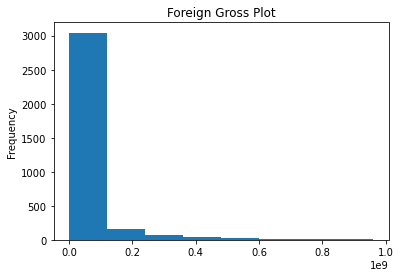

In [66]:
# Calculate the mean and median
foreign_mean = df_bom['foreign_gross'].mean()
foreign_median = df_bom['foreign_gross'].median()

print(foreign_mean)
print(foreign_median)


# Plot the histogram for the foreign_gross column
ax = df_bom['foreign_gross'].plot(kind = 'hist', bins=8)
ax.set_title('Foreign Gross Plot');

Th eplot of the foreign gross column shows a positive skew of the data. In such a situation, we use the median to fill the missing values as it is the best interpolation technique.

In [65]:
# Using the median to fill the missing values in foreign_gross column

df_bom['foreign_gross'] = df_bom['foreign_gross'].fillna(median)

# Confirm if the changes are made
df_bom.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

After the foreign_gross column, we will do the same for the domestic_gross column.

28745845.06698422
1400000.0


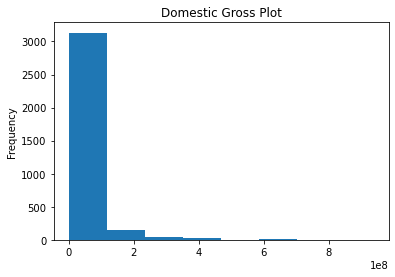

In [67]:
# Calculate the mean, median and plot the domestic_gross column
domestic_mean = df_bom['domestic_gross'].mean()
domestic_median = df_bom['domestic_gross'].median()

print(domestic_mean)
print(domestic_median)

# Plot
ax = df_bom['domestic_gross'].plot(kind = 'hist', bins=8)
ax.set_title('Domestic Gross Plot');

In [68]:
# Fill the missing values with the median
df_bom['domestic_gross'] = df_bom['domestic_gross'].fillna(median)

# Confirm if the changes are made
df_bom.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

For the missing values in studio, we will drop the rows.


In [69]:
# Drop the rows that have missing values in the studio column
df_bom = df_bom.dropna()

# Check if the changes have been made
df_bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

The dataset contains missing values in the following columns: studio, domestic_gross and foreign_gross. The missing data in the columns need to be dealt with in the most approproate method to ensure the integrity od the data is maintained. The studio column has a total of 5 missing vales which make 0.14% of the data. This is an insignificant amount so we can easily drop the rows. For the doestic_gross and foreign_gross columns, the number of row with missing data is quite significant; hence dropping the rows will lead to a loss of data. The missing values in the domestic_gross column make 0.83% of the data. In the foreign_gross column, missing values mae 39.86% of the data. 

Now we check for duplicates which is the next step in data cleaning

In [70]:
# Check for duplicates in the BOM data
duplicates = df_bom[df_bom.duplicated()]
print(len(duplicates)) # Checking for the number of duplicates in the data
duplicates.head()

0


,title,studio,domestic_gross,foreign_gross,year


There are no duplicateds in this data set. Now we check of any placeholder values in the data.

In [71]:
# Iterate thorugh the columns to find any extraneous values
for col in df_bom.columns:
    print(col, '\n', df_bom[col].value_counts(normalize=True).head(), '\n\n')

title 
 Bluebeard                                0.000591
Soul Surfer                              0.000296
The Accidental Detective 2: In Action    0.000296
Rising From Ashes                        0.000296
Muran                                    0.000296
Name: title, dtype: float64 


studio 
 IFC      0.049083
Uni.     0.043465
WB       0.041396
Magn.    0.040213
Fox      0.040213
Name: studio, dtype: float64 


domestic_gross 
 1400000.0    0.014488
1100000.0    0.009462
1300000.0    0.008870
1000000.0    0.008870
1200000.0    0.007392
Name: domestic_gross, dtype: float64 


foreign_gross 
 1400000.0    0.400946
1200000.0    0.006801
1100000.0    0.004140
4200000.0    0.003548
1900000.0    0.003548
Name: foreign_gross, dtype: float64 


year 
 2015    0.133057
2016    0.128918
2012    0.117978
2011    0.117682
2014    0.116499
Name: year, dtype: float64 




There are no placeholder values in this data set.